[0.         0.01383508 0.02765956 0.04146286 0.05523442 0.06896367
 0.08264011 0.09625327 0.10979272 0.12324809]
[1.         0.99990427 0.99961711 0.99913856 0.99846872 0.99760773
 0.99655573 0.99531294 0.99387959 0.99225596]
[1.         1.01373935 1.02727667 1.04060143 1.05370314 1.0665714
 1.07919584 1.09156621 1.10367231 1.11550404]
Number of samples 10000
Timestep in ms 5.0005000500050007e-08
Sample Rate =  44100
220500
Total time = Sample Rate/No. of Samples =  5.0


C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


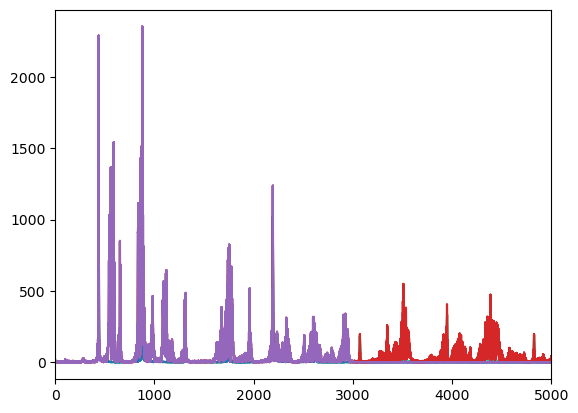

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…


10000
[-0.99980002 -0.89979002 -0.79978001 ...  0.80018001  0.90019002
 -0.99980002]
5001
[-1.19371180e-12+0.00000000e+00j -2.05000465e+00+1.59169601e+02j
 -2.05000346e+00+7.95829079e+01j ...  1.94999346e+00-2.48185444e-03j
  1.94999464e+00-1.24092747e-03j -4.98050015e+02+0.00000000e+00j]
[ 3.14159265e+00  1.58367499e+00  1.59654998e+00 ... -1.27274945e-03
 -6.36374723e-04  3.14159265e+00]


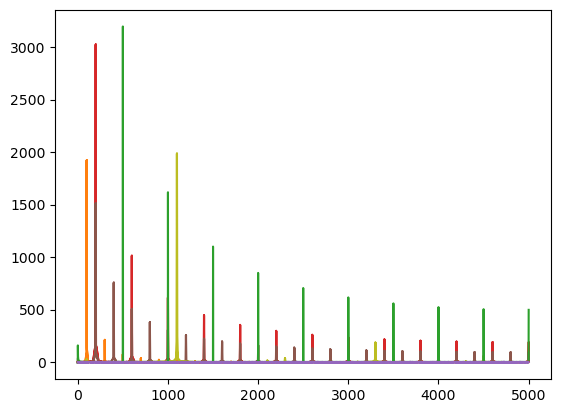

In [1]:
import Chapter01
from Chapter01 import *
from Chapter02 import *
import numpy as np
import math
import matplotlib.pyplot as plt
import os

In [2]:
def interpolate(ts, f0, f1):
    t0, t1 = ts[0], ts[-1]
    return f0 + (f1 - f0) * (ts - t0) / (t1 - t0)
        
def chirp(ts,f0,f1,amp):
    PI2=math.pi*2
    # compute the frequencies
    ts = np.asarray(ts)
    freqs = interpolate(ts, f0, f1)

    # compute the time intervals
    dts = np.diff(ts, append=ts[-1])

    # compute the changes in phase
    dphis = PI2 * freqs * dts
    dphis = np.roll(dphis, 1)

    # compute phase
    phases = np.cumsum(dphis)

    # compute the amplitudes
    ys = amp * np.cos(phases)
    return ys    

In [10]:
t=[]
duration = 2
t = np.linspace(0,duration,11025)

signal = chirp(t,220,880,1)
# plt.plot(t,signal)

audio = Audio(signal,rate=round(11025/2))
audio

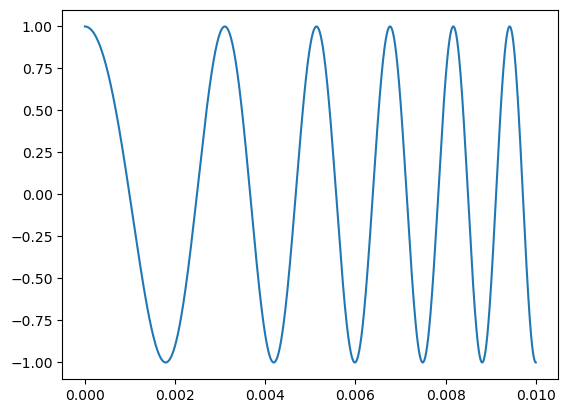

In [16]:
t_seg=[]
duration = 0.01
t_seg = np.linspace(0,duration,11025)

signal_seg = chirp(t_seg,220,880,1)
plt.plot(t_seg,signal_seg)

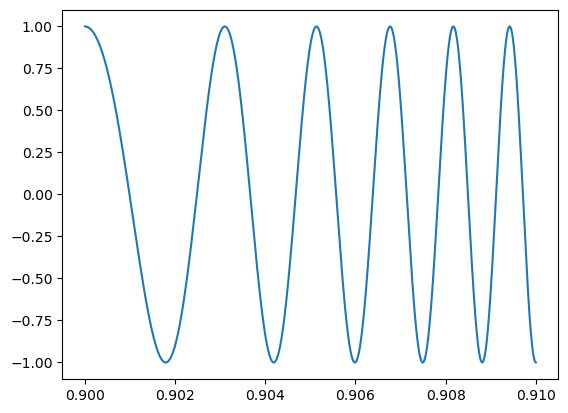

In [5]:
t_seg=[]
duration = 0.91
t_seg = np.linspace(0.9,duration,5000)

signal_seg = chirp(t_seg,220,880,1)
plt.plot(t_seg,signal_seg)